<a href="https://colab.research.google.com/github/4nands/L20251022/blob/main/P20251024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0 0 0 1]


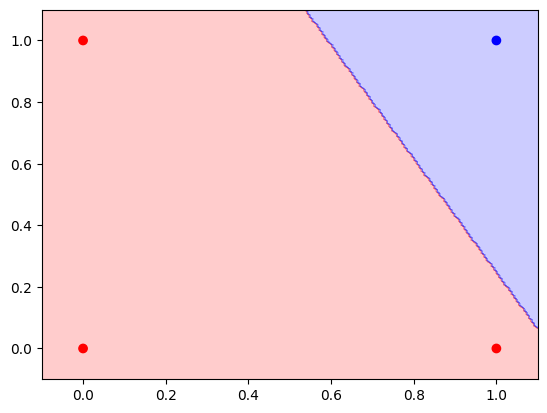

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class Perceptron:

  def __init__(self):

    self.W = np.random.randn(2,1)
    self.b = 0

    self.dW = np.zeros_like(self.W)
    self.db = 0

    self.inputs = None

  def forward(self,x):

    self.inputs = x

    z = x @ self.W + self.b

    return (z>1)*1

  def backward(self,dout):

    self.dW = self.inputs.T @ dout
    self.db = np.sum(dout)

  def optimizer(self,lr=0.1):

    self.W -= lr * self.dW
    self.b -= lr * self.db

  def predict(self,x):

    out = self.forward(x)

    return out.flatten()

  def fit(self,x,y,epochs=100):

    for i in range(epochs):

      out = self.forward(x)
      dout = out - y
      self.backward(dout)
      self.optimizer()

x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1]).reshape(4,1)

ppn = Perceptron()
ppn.fit(x,y,epochs=100)
pred = ppn.predict(x)
print(pred)

colors = ['red','blue']
cmap = ListedColormap(colors)
x1 = np.linspace(-0.1,1.1,200)
x2 = np.linspace(-0.1,1.1,200)
xx1,xx2 = np.meshgrid(x1,x2)
xx = np.array([xx1.flatten(),xx2.flatten()]).T
z = ppn.predict(xx).reshape(xx1.shape)
plt.contourf(xx1,xx2,z,cmap=cmap,alpha=0.2)

c=[colors[i] for i in y.flatten()]
plt.scatter(x[:,0],x[:,1],c=c)
plt.show()

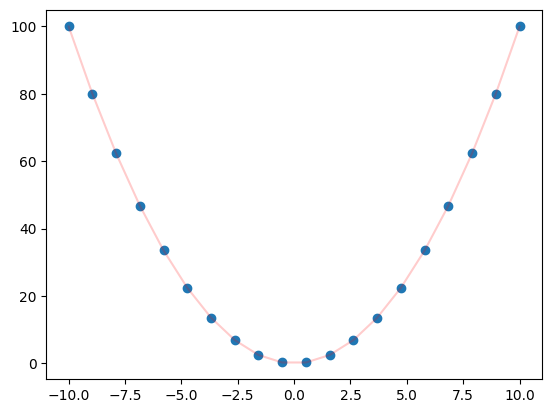

In [82]:
import matplotlib.pyplot as plt
import numpy as np


x = np.linspace(-10,10,20)
y = x**2

plt.scatter(x,y)
plt.plot(x,y,c='red',alpha=0.2)
plt.show()